# CNN example
Train a ConvNet on the MNIST fashion data.  This data consists of 10 classes of fashion images such as shorts, dresses, shoes, purses, etc.  These images replace the handwritten digits in the classic MNIST dataset.
This change makes it harder to get a high score and more closely reflects real world usage of image classification.  And at the same time, is still small enough for the average PC to train in a short time.
See https://github.com/zalandoresearch/fashion-mnist for information and code on Fashion MNIST

This code is based on MNIST example found at Keras.io

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [29]:
#from __future__ import print_function
from keras.datasets import fashion_mnist  # new with Keras 2.1.2.  Yah!!
# the data, shuffled and split between train and test sets
%time (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

Wall time: 375 ms


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
#setup
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#   Supress warning and informational messages
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Number of classes - do not change unless the data changes
num_classes = 10

# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

# input image dimensions
img_rows, img_cols = 28, 28

In [30]:
#   Deal with format issues between different backends.  
# Some put the # of channels in the image before the width and height 
# of image.
# tensorflow is 'channels_last'
# might get a 'dimension mismatch' error if this is not done
#getting errors from fit (training) - eems to expect a batchsize
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
K.image_data_format()

'channels_last'

In [31]:
#   Type convert and scale the test and training data to be 0-1 
# instead of 0-255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [32]:
print(y_train[:4])
# convert class vectors to binary class matrices.  One-hot encoding
# prevent classification from assuming class is an ordered number
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[:4])   # verify one-hot encoding

[9 0 0 3]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [46]:
# Define the model
model = Sequential()
def v1(model):
    # V1 
    # time series data might use 1D and video might use 3D
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 2nd round of convolution
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())#convert output to 1D feature vector for dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))# cope with over-fitting
    #classification layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

def v2(model):
    # V2 - changing the 2nd conv layer to have 64 filters
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def v3(model):
    #V3 - removing early pooling layer
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    ## model.add(Dropout(0.25)) #not in the video
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def v3_1(model): #not covered in video
    #V3 - additional dropout
    model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def v4(model):#not covered in video
    #V4 - remove 1st max pool
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

model = v3(model)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [47]:
#   define compile to minimize categorical loss, 
# use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [50]:
%%time 
# v2=8 min; v3 ~ 20min
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
# strange errors about dimensions of test data
print(f"batch_size {batch_size} epochs={epochs}")
hist = model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 54s 892us/step - loss: 0.5712 - accuracy: 0.7982 - val_loss: 0.3624 - val_accuracy: 0.8727
Epoch 2/24
60000/60000 [==============================] - 53s 883us/step - loss: 0.3573 - accuracy: 0.8736 - val_loss: 0.3026 - val_accuracy: 0.8894
Epoch 3/24
60000/60000 [==============================] - 53s 879us/step - loss: 0.3022 - accuracy: 0.8924 - val_loss: 0.2729 - val_accuracy: 0.9020
Epoch 4/24
60000/60000 [==============================] - 53s 885us/step - loss: 0.2679 - accuracy: 0.9032 - val_loss: 0.2584 - val_accuracy: 0.9079
Epoch 5/24
60000/60000 [==============================] - 52s 873us/step - loss: 0.2455 - accuracy: 0.9117 - val_loss: 0.2493 - val_accuracy: 0.9079
Epoch 6/24
60000/60000 [==============================] - 53s 877us/step - loss: 0.2222 - accuracy: 0.9207 - val_loss: 0.2339 - val_accuracy: 0.9141
Epoch 7/24
60000/60000 [==============================] 

In [51]:
#   Evaluate the model with the test data to get the scores on "real" data.
# ideally this would be an entirely separate dataset not used for validation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2552990923136473
Test accuracy: 0.9297999739646912


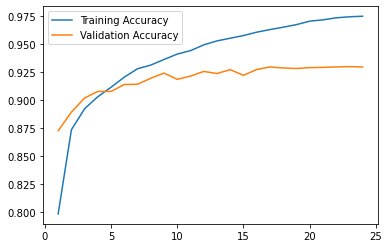

In [52]:
#   Plot data to see relationships in training and validation data
# changed acc to accuracy
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list,
         hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [40]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

# why do we never show how the model is used

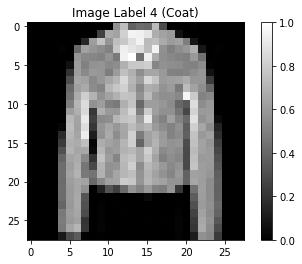

In [73]:
#orig y_test is lost so need to convert it back
y_labels = [list(x).index(1) for x in y_test]
# Define class names to display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def show_image(index, images, labels, class_names):
    #return str(labels[index]) + ' (' +  class_names[labels[index]] + ')'
    img_label = str(labels[index]) + ' (' +  class_names[labels[index]] + ')'
    plt.figure()
    plt.title('Image Label ' + img_label) 
    plt.imshow(images[index], cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
    plt.colorbar()
    plt.show()

show_image(10, x_test, y_labels, class_names)


In [75]:
x_test[10].shape

(28, 28, 1)

In [94]:
y_pred = model.predict(x_test[:100])#input needs to be multiple rows

In [99]:
y_max = [list(x).index(x.max()) for x in y_pred]

In [105]:
import pandas as pd
res = pd.DataFrame(zip(y_labels, y_max), columns =['orig','pred'])
res.sample(10)

,orig,pred
98,4,4
19,0,0
93,7,7
85,0,0
68,9,7
10,4,4
97,1,1
45,7,7
12,7,7
34,8,8


In [107]:
res.apply(lambda x: x['orig'] != x['pred'], axis=1).value_counts()

False    91
True      9
dtype: int64

In [108]:
res[res.apply(lambda x: x['orig'] != x['pred'], axis=1)]

,orig,pred
17,4,6
23,9,5
25,4,6
42,3,4
48,2,6
49,2,6
67,3,4
68,9,7
74,2,4


 thought this was Shirt


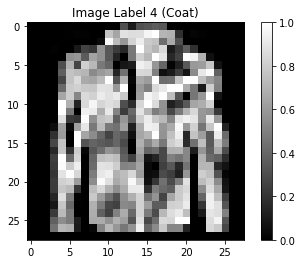

In [130]:
ixval = 17
r = res.loc[ixval]

print(f" thought this was {class_names[r['pred']]}")
show_image(ixval, x_test, y_labels, class_names)